<a href="https://colab.research.google.com/github/uanushkatkd/CS6910_Assignment1/blob/main/Dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from signal import signal,SIGPIPE, SIG_DFL
signal(SIGPIPE,SIG_DFL)
!pip install wandb -qU
import wandb
!wandb login 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.1/189.1 KB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 5.1 MB/s eta 0:00:00
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [2]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.datasets import mnist

from sklearn.model_selection import train_test_split
import math

from tqdm import tqdm



In [ ]:
# # Question 1: plots using wandb

# start a new wandb run to track this script
wandb.init(
    # set the wandb project where this run will be logged
    project="CS6910_Assignment_1",
)
# Loading the fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
#class names for fashion-MNIST
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# creating 2x5 grid 
img={}

for i in range(10):
    # to find first image in the training set with class label i
    idx = np.where(y_train == i)[0][0]
    # Plot the image
    img[class_names[i]]=(wandb.Image(x_train[idx], caption=class_names[i]))
    
wandb.log(img)    
# [optional] finish the wandb run, necessary in notebooks
wandb.finish()

wandb: Currently logged in as: cs22s015. Use `wandb login --relogin` to force relogin


4422102/4422102 [==============================] - 0s 0us/step


In [3]:

# one hot encoding
#from keras.utils import to_categorical
def onehot_encoding(a,n_class):
  temp = []
  for i in a:
    t1 = np.zeros(n_class)
    t1[i] = 1
    temp.append(t1)
  temp=np.array(temp)
  return temp

# Loading the fashion-MNIST dataset

def load_data(dataset):
  if dataset=='fashion_mnist':
    (x_tr, y_tr), (x_test, y_test) = fashion_mnist.load_data()
    #class names for fashion-MNIST
    class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

  elif dataset=='mnist':
    (x_tr, y_tr), (x_test, y_test) = mnist.load_data()
    #class names for MNIST
    class_names = [0,1,2,3,4,5,6,7,8,9]

    

  x_train,x_val,y_train, y_val = train_test_split(x_tr,y_tr ,random_state=104,test_size=0.10, shuffle=True)
  # creating 2x5 grid 
  # Question 1: plots without using wandb
  fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
  ax1=ax.flat
  for i in range(10):
    # to find first image in the training set with class label i
    idx = np.where(y_train == i)[0][0]
    # Plot the image
    ax1[i].imshow(x_train[idx], cmap='gray')
    ax1[i].set_xlabel(class_names[i])
    ax1[i].set_xticklabels([])
    ax1[i].set_yticklabels([])
    # Display the plot
  plt.show()
  # Normalize data
  x_train,x_val,x_test= x_train/255.0,x_val/255.0,x_test/255.0
  #one hot encoding
  #Reshaping train and test data
  x_train,x_val,x_test=x_train.reshape(len(x_train),28*28),x_val.reshape(len(x_val),28*28),x_test.reshape(len(x_test),28*28)
  # one hot encoding
  y_train=onehot_encoding(y_train,10)  #run once only
  y_val = onehot_encoding(y_val,10)
  y_test = onehot_encoding(y_test,10)
  print(y_val)
  #y_test = to_categorical(y_test, dtype ="uint8")
  # Labels after applying the function
  # Training set labels
  #print(x_train.shape)
  print(y_val.shape)
  
  return x_train,x_test,x_val,y_train,y_test,y_val,class_names




In [ ]:
# Question 2: this code outputs the final probability of forward propagation for one pass of the data
x_train,x_test,x_val,y_train,y_test,y_val,class_names=load_data('fashion_mnist')
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

hidden_layer=[256,128,64]
no_of_class=10
layer_dim=[x_train.shape[1]]+hidden_layer+[no_of_class]
print(layer_dim)
def initialise_params(train,label,layers):

  params={}
  L=len(layers)
  w=[]
  b=[]
  for i in range(1,L):
    params['W'+str(i)]= np.random.randn(layers[i], layers[i-1]) * 0.05
    params['b' + str(i)] =  np.zeros((layers[i], 1))

  return params  

def forward_prop(train,label,layers,params):
  L=len(layers)
  a={}
  h={}
  h['h'+str(0)]=(train.T)
  
  for i in range(1,L-1):
    #preactivation calculation
    print(i)
    a['a'+str(i)]= params['W'+str(i)] @ h['h'+str(i-1)]+ params['b'+str(i)]
    
    #activation calculation
    h['h'+str(i)]=sigmoid(a['a'+str(i)])
    
  a['a'+str(L-1)]= params['W'+str(L-1)] @ (h['h'+str(L-2)]) +params['b'+str(L-1)]
  y_prob=[]
  for i in range(len(a['a'+str(L-1)][0])):
    y_prob.append(softmax(a['a'+str(L-1)][:,i]))
  y_prob=np.array(y_prob)
  h['h'+str(L-1)]=y_prob
  
  return a,h,y_prob

def sigmoid(x):
  return 1/(1+np.exp(-x))

def softmax(x):
   return (np.exp(x)/np.exp(x).sum())



p=initialise_params(x_train,y_train,layer_dim)
for key,val in p.items():
  print(key,'->',val.shape)
  
a1,h1,y_h=forward_prop(x_train[:10,:],y_train[:10,:],layer_dim,p)
print((y_h[0]))
for key,val in a1.items():
  print(key,'->',val.shape)
for key,val in h1.items():
  print(key,'->',val.shape)

#print(y_train)

[784, 256, 128, 64, 10]
W1 -> (256, 784)
b1 -> (256, 1)
W2 -> (128, 256)
b2 -> (128, 1)
W3 -> (64, 128)
b3 -> (64, 1)
W4 -> (10, 64)
b4 -> (10, 1)
1
2
3
[0.10065752 0.10165254 0.08910951 0.10880497 0.1042676  0.10800967
 0.08811031 0.1096371  0.07022441 0.11952637]
a1 -> (256, 10)
a2 -> (128, 10)
a3 -> (64, 10)
a4 -> (10, 10)
h0 -> (784, 10)
h1 -> (256, 10)
h2 -> (128, 10)
h3 -> (64, 10)
h4 -> (10, 10)


In [4]:
# Code for neural network. 
'''
The class named NN consists of the code for
wight initialization 
forward porpagation
back porpagation
activation functions
optimizers
'''

np.random.seed(1)
class NN:
  def __init__(self,layers,epochs,lr,activation_func,loss_func,optimizer,initialize,batch_size,dataset,m,beta,beta1,beta2,epsilon,weight_decay):
    self.layers = layers
    self.epochs = epochs
    self.lr = lr
    self.activation_func=activation_func
    self.loss_func=loss_func
    self.optimizer=optimizer
    self.initialize=initialize
    self.weight_decay=weight_decay
    self.batch_size=batch_size
    self.dataset=dataset
    self.m=m
    self.beta=beta
    self.beta1=beta1
    self.beta2=beta2
    self.epsilon=epsilon
    self.params=self.initialise_params()
    self.L=len(self.layers)
    
  def initialise_params(self):
    params={}
    L=len(self.layers)
    
    for i in range(1,L):
      if self.initialize=='random':
        params['W'+str(i)]= np.random.randn(self.layers[i], self.layers[i-1]) * 0.1
      elif self.initialize=='xavier':
        params['W'+str(i)]= np.random.randn(self.layers[i], self.layers[i-1]) * np.sqrt(2/ (self.layers[i - 1] + self.layers[i]))
      elif self.initialize=='he_normal':
         params['W' + str(i)] = np.random.randn(self.layers[i], self.layers[i-1]) * np.sqrt(2/self.layers[i-1])
      elif self.initialize=='he_uniform':
         params['W' + str(i)] = np.random.uniform(low=-np.sqrt(6 / self.layers[i-1]), high=np.sqrt(6 /self.layers[i-1]), size=(self.layers[i], self.layers[i-1]))
  
      params['b' + str(i)] =  np.zeros((self.layers[i], 1))

    return params  
  
  def updates(self):
    updates={}
    L=len(self.layers)
   
    for i in range(1,self.L):
      updates['W'+str(i)]= np.zeros((self.layers[i], self.layers[i-1])) 
      updates['b' + str(i)] =  np.zeros((self.layers[i], 1))

    return updates  

  def sigmoid(self, x, derivative=False):
    if derivative:
      return (np.exp(-x))/((np.exp(-x)+1)**2)
    return 1/(1 + np.exp(-x))

  def identity(self, x, derivative=False):
    if derivative:
      return 1
    return x


  def tan_h(self, x, derivative=False):
    t=np.tanh(x)
    if derivative:
      return 1-t**2
    return t

  def relu(self, x, derivative=False):
    if derivative:
      return 1*(x>0)
    return np.maximum(0,x)


  def softmax(self, x, derivative=False):
    exps = np.exp(x - x.max())
    if derivative:
      return exps / np.sum(exps, axis=0) * (1 - exps / np.sum(exps, axis=0))
    return exps/np.sum(exps, axis=0)
  
  def regularization_loss(self):
    # Calculate the L2 regularization loss
    L=len(self.layers)
    regularization_loss = 0.0
    for i in range(1,L):
      regularization_loss += np.sum(np.square(self.params['W'+str(i)]))
    regularization_loss *= self.weight_decay
    return regularization_loss

  def forward_prop(self,train):
    params = self.params
    L=len(self.layers)
   
    a={}
    h={}
    train=train.T
    h['h'+str(0)]=train.reshape(len(train),1)
    for i in range(1,L-1):
      #preactivation calculation
      #print(i)
      a['a'+str(i)]= params['W'+str(i)] @ h['h'+str(i-1)]+ params['b'+str(i)]
        #activation calculation
      if self.activation_func=='tanh':
        h['h'+str(i)]=self.tan_h(a['a'+str(i)])
      elif self.activation_func=='sigmoid':
        h['h'+str(i)]=self.sigmoid(a['a'+str(i)])
      elif self.activation_func=='relu':
        h['h'+str(i)]=self.relu(a['a'+str(i)])
      elif self.activation_func=='identity':
        h['h'+str(i)]=self.identity(a['a'+str(i)])


    a['a'+str(L-1)]= params['W'+str(L-1)] @ (h['h'+str(L-2)]) +params['b'+str(L-1)]
    y_prob=[]
    for i in range(len(a['a'+str(L-1)][0])):
      y_prob.append(self.softmax(a['a'+str(L-1)][:,i]))
    y_prob=np.array(y_prob)
    h['h'+str(L-1)]=y_prob
  
    return a,h,y_prob
  
  def backward_prop(self, y_train, y_hat,a,h):
    params = self.params
    delta_params = {}
    L=len(self.layers)
   
    y_train=y_train.reshape(len(y_train),1)
    # Compute output gradient
        # Gardient with respect to last layer
    if self.loss_func == 'cross_entropy':
      delta_params['a' + str(L-1)] = (y_hat - y_train)
    elif self.loss_func == 'squared_error':
      delta_params['a' + str(L-1)] = (y_hat - y_train)*y_hat*(1-y_hat)
    
    
    for i in range(L-1,0,-1):
      #gradients w rt parameters 
      delta_params['W' + str(i)]=(delta_params['a' + str(i)]@(h['h'+str(i-1)].T))+self.weight_decay*params['W'+str(i)]
      delta_params['b' + str(i)]=np.sum(delta_params['a' + str(i)],axis=1,keepdims=True)

      #gradients w rt layer below

      delta_params['h' + str(i-1)]=(params['W' + str(i)].T)@ delta_params['a' + str(i)]

      #gradients w rt layer below(preactivation)

      if i > 1:
        if self.activation_func=='tanh':
          delta_params['a' + str(i-1)] = delta_params['h' + str(i-1)] * self.tan_h(a['a' + str(i-1)], derivative=True)  
        elif self.activation_func=='sigmoid':
          delta_params['a' + str(i-1)] = delta_params['h' + str(i-1)] * self.sigmoid(a['a' + str(i-1)], derivative=True)  
        elif self.activation_func=='relu':
          delta_params['a' + str(i-1)] = delta_params['h' + str(i-1)] * self.relu(a['a' + str(i-1)], derivative=True)  
        elif self.activation_func=='identity':
          delta_params['a' + str(i-1)] = delta_params['h' + str(i-1)] * self.identity(a['a' + str(i-1)], derivative=True)  


    return delta_params
  
  
  def loss_fun(self,y,y_hat):
    if self.loss_func == 'cross_entropy':
      i=np.argmax(y)
      p=y_hat[i]
      loss=-np.log(p)+self.regularization_loss()
      return loss
    elif self.loss_func == 'squared_error':
      return np.sum((y-y_hat)**2)+self.regularization_loss()
 
 
  def modelPerformance(self, x_test, y_test):
    predictions = []
    y_true = []
    y_pred = []
    losses = []
    for x,y in tqdm(zip(x_test ,y_test), total=len(x_test)):
      a,h,y_p = self.forward_prop(x)
      predictedClass = np.argmax(y_p)
      y.reshape(len(y),1)
      actualClass = np.argmax(y)
      y_true.append(actualClass)
      y_pred.append(predictedClass)
      predictions.append(predictedClass == actualClass)
      losses.append(self.loss_fun(y.T,y_p.T))
    accuracy = (np.sum(predictions)*100)/len(predictions)
    loss = np.sum(losses)/len(losses)
    
    return accuracy, loss, y_true, y_pred

     
  def sgd(self,x_train,y_train,x_test,y_test,x_val,y_val):
    weights=self.params
    e=self.epochs
    for i in range(e):
      t=0
      dw_db=self.updates()
      print("epoch",i+1)
      for x,y in (zip(x_train,y_train)):
        a,h,y_p=self.forward_prop(x)
        
        delta_theta=self.backward_prop(y.T,y_p.T,a,h)
        
        for i in dw_db:
           dw_db[i]+=delta_theta[i]

        t=t+1
        if (t%self.batch_size==0):
          for key in weights:
            weights[key]=weights[key] - (self.lr)*dw_db[key]
          
          dw_db=self.updates()

      
      val_acc,val_loss,y_true1,y_perd1=self.modelPerformance(x_val,y_val)
      print("Val Accuracy = " + str(val_acc))
      print("Val Loss = " + str(val_loss))

      train_acc,train_loss,y_true2,y_perd2=self.modelPerformance(x_train,y_train)
      print("Train Accuracy = " + str(train_acc))
      print("Train Loss = " + str(train_loss))

      
      test_acc,test_loss,y_true2,y_perd2=self.modelPerformance(x_test,y_test)


      #wandb.log({"val_acc": val_acc, "train_acc": train_acc, "test_acc": test_acc, "val_loss": val_loss, "train_loss": train_loss,"test_loss":test_loss,"epoch": e+1})
	
    self.params=weights
    return weights

  def momentum(self,x_train,y_train,x_test,y_test,x_val,y_val):
    beta=self.m
    
    weights=self.params
    
    update= self.updates()
    e=self.epochs
    for i in range(e):
      t=0
      dw_db=self.updates()
      lookahead=self.updates()
      print("epoch",i+1)
      for x,y in (zip(x_train,y_train)):
        a,h,y_p=self.forward_prop(x)
        
        delta_theta=self.backward_prop(y.T,y_p.T,a,h)
        
        for i in dw_db:
           dw_db[i]+=delta_theta[i]

        t=t+1
        if (t%self.batch_size==0):
          for key in lookahead:
            lookahead[key]=beta*update[key]+self.lr*dw_db[key]
          
          for key in weights:
           weights[key]=weights[key] - lookahead[key]

          
          for key in update:
             update[key] =lookahead[key]
          
          dw_db=self.updates()
  

      
      val_acc,val_loss,y_true1,y_perd1=self.modelPerformance(x_val,y_val)
      print("Val Accuracy = " + str(val_acc))
      print("Val Loss = " + str(val_loss))

      train_acc,train_loss,y_true2,y_perd2=self.modelPerformance(x_train,y_train)
      print("Train Accuracy = " + str(train_acc))
      print("Train Loss = " + str(train_loss))

      
      test_acc,test_loss,y_true2,y_perd2=self.modelPerformance(x_test,y_test)


      #wandb.log({"val_acc": val_acc, "train_acc": train_acc, "test_acc": test_acc, "val_loss": val_loss, "train_loss": train_loss,"test_loss":test_loss,"epoch": e+1})
	
    self.params=weights
    return weights

    
   
     
  def nestrov(self,x_train,y_train,x_test,y_test,x_val,y_val):

    
    beta=self.m
    
    weights=self.params
    update= self.updates()
    
    e=self.epochs
    for i in range(e):
      dw_db= self.updates()

      lookahead= self.updates()

      #do partial updates
      for key in lookahead:
        lookahead[key]=beta*update[key]
    
      t=0
   
      print("epoch",i+1)
      for x,y in (zip(x_train,y_train)):
        
   
        a,h,y_p=self.forward_prop(x)
        
        delta_theta=self.backward_prop(y.T,y_p.T,a,h)
      
        for i in dw_db:
           dw_db[i]+=delta_theta[i]

        t=t+1
        if (t%self.batch_size==0):
          for key in lookahead:
            lookahead[key]=beta*update[key]+self.lr*dw_db[key]
          
          for key in weights:
           weights[key]=weights[key] - lookahead[key]

          
          for key in update:
             update[key] =lookahead[key]
          dw_db=self.updates()

       
      val_acc,val_loss,y_true1,y_perd1=self.modelPerformance(x_val,y_val)
      print("Val Accuracy = " + str(val_acc))
      print("Val Loss = " + str(val_loss))

      train_acc,train_loss,y_true2,y_perd2=self.modelPerformance(x_train,y_train)
      print("Train Accuracy = " + str(train_acc))
      print("Train Loss = " + str(train_loss))

      
      test_acc,test_loss,y_true2,y_perd2=self.modelPerformance(x_test,y_test)


      wandb.log({"val_acc": val_acc, "train_acc": train_acc, "test_acc": test_acc, "val_loss": val_loss, "train_loss": train_loss,"test_loss":test_loss,"epoch": e+1})
	
    self.params=weights
    return weights
       

  def rmsprop(self,x_train,y_train,x_test,y_test,x_val,y_val):

    
    beta=self.m
    eps=self.epsilon
    
    weights=self.params
    update= self.updates()
    
    e=self.epochs
    for i in range(e):
      t=0
    
      dw_db= self.updates()

      
      print("epoch",i+1)
      for x,y in (zip(x_train,y_train)):
        
   
        a,h,y_p=self.forward_prop(x)
        
        #print("y_hat",y[0])
        delta_theta=self.backward_prop(y.T,y_p.T,a,h)
       
        for i in dw_db:
           dw_db[i]+=delta_theta[i]

        t=t+1
        if (t%self.batch_size==0):
          for key in update:
            update[key]=beta*update[key]+(1-beta)*(dw_db[key]**2)
          
          for key in weights:
           weights[key]=weights[key] - (self.lr/np.sqrt(update[key]+eps))*dw_db[key]
          
          
          dw_db=self.updates()

       
      val_acc,val_loss,y_true1,y_perd1=self.modelPerformance(x_val,y_val)
      print("Val Accuracy = " + str(val_acc))
      print("Val Loss = " + str(val_loss))

      train_acc,train_loss,y_true2,y_perd2=self.modelPerformance(x_train,y_train)
      print("Train Accuracy = " + str(train_acc))
      print("Train Loss = " + str(train_loss))

      
      test_acc,test_loss,y_true2,y_perd2=self.modelPerformance(x_test,y_test)


      #wandb.log({"val_acc": val_acc, "train_acc": train_acc, "test_acc": test_acc, "val_loss": val_loss, "train_loss": train_loss,"test_loss":test_loss,"epoch": e+1})
	
    self.params=weights
    return weights
    
  def adam(self,x_train,y_train,x_test,y_test,x_val,y_val):

    beta1=self.beta1
    beta2=self.beta2
    eps=self.epsilon
   
    weights=self.params
    mw_mb= self.updates()
    vw_vb=self.updates()
    
    mw_mb_hat= self.updates()
    vw_vb_hat=self.updates()
    
    e=self.epochs
    for i in range(e):
      t=0

      dw_db= self.updates()

      
      print("epoch",i+1)
      for x,y in (zip(x_train,y_train)):
        
   
        a,h,y_p=self.forward_prop(x)
        
        #print("y_hat",y[0])
        delta_theta=self.backward_prop(y.T,y_p.T,a,h)
       
        for j in dw_db:
           dw_db[j]+=delta_theta[j]

        t=t+1
        if (t%self.batch_size==0):
          for key in mw_mb:
            mw_mb[key]=beta1*mw_mb[key]+(1-beta1)*(dw_db[key])

          for key in vw_vb:
            vw_vb[key]=beta2*vw_vb[key]+(1-beta2)*(dw_db[key]**2)

          for key in weights:
            mw_mb_hat[key]=mw_mb[key]/(1-(beta1**(i+1)))
            vw_vb_hat[key]=vw_vb[key]/(1-(beta2**(i+1)))
            

          for key in weights:
           weights[key]=weights[key] - (self.lr/np.sqrt(vw_vb_hat[key]+eps))*mw_mb_hat[key]

          
          dw_db=self.updates()

       
      val_acc,val_loss,y_true1,y_perd1=self.modelPerformance(x_val,y_val)
      print("Val Accuracy = " + str(val_acc))
      print("Val Loss = " + str(val_loss))

      train_acc,train_loss,y_true2,y_perd2=self.modelPerformance(x_train,y_train)
      print("Train Accuracy = " + str(train_acc))
      print("Train Loss = " + str(train_loss))

      
      test_acc,test_loss,y_true2,y_perd2=self.modelPerformance(x_test,y_test)


      #wandb.log({"val_acc": val_acc, "train_acc": train_acc, "test_acc": test_acc, "val_loss": val_loss, "train_loss": train_loss,"test_loss":test_loss,"epoch": e+1})
	
    self.params=weights
    return weights
         
 

     
    
  def nadam(self,x_train,y_train,x_test,y_test,x_val,y_val): #update nadam

    beta1=self.beta1
    beta2=self.beta2
    eps=self.epsilon
 
    weights=self.params
    update= self.updates()
  
    mw_mb= self.updates()
    vw_vb=self.updates()
    mw_mb_hat= self.updates()
    vw_vb_hat=self.updates()
    
    beta=self.beta
    e=self.epochs
    for i in range(e):
      dw_db= self.updates()
      lookahead=self.updates()

      t=0

      #do partial updates
      for key in lookahead:
        lookahead[key]=beta*update[key]

     

      print("epoch",i+1)
      for x,y in (zip(x_train,y_train)):
        
   
        a,h,y_p=self.forward_prop(x)
        
        #print("y_hat",y[0])
        delta_theta=self.backward_prop(y.T,y_p.T,a,h)
       
        for j in dw_db:
           dw_db[j]+=delta_theta[j]

        t=t+1
        if (t%self.batch_size==0):
          
          for key in lookahead:
            lookahead[key]=beta*update[key]+self.lr*dw_db[key]

          for key in mw_mb:
            mw_mb[key]=beta1*mw_mb[key]+(1-beta1)*(dw_db[key])

          for key in vw_vb:
            vw_vb[key]=beta2*vw_vb[key]+(1-beta2)*(dw_db[key]**2)

          for key in weights:
            mw_mb_hat[key]=mw_mb[key]/(1-(beta1**(i+1)))
            vw_vb_hat[key]=vw_vb[key]/(1-(beta2**(i+1)))
            

          for key in weights:
           weights[key]=weights[key] - (self.lr/np.sqrt(vw_vb_hat[key]+eps))*mw_mb_hat[key]
          
          
          for key in update:
             update[key] =lookahead[key]

          dw_db=self.updates()       
      
      val_acc,val_loss,y_true1,y_perd1=self.modelPerformance(x_val,y_val)
      print("Val Accuracy = " + str(val_acc))
      print("Val Loss = " + str(val_loss))

      train_acc,train_loss,y_true2,y_perd2=self.modelPerformance(x_train,y_train)
      print("Train Accuracy = " + str(train_acc))
      print("Train Loss = " + str(train_loss))

      
      test_acc,test_loss,y_true2,y_perd2=self.modelPerformance(x_test,y_test)


      #wandb.log({"val_acc": val_acc, "train_acc": train_acc, "test_acc": test_acc, "val_loss": val_loss, "train_loss": train_loss,"test_loss":test_loss,"epoch": e+1})
	
    self.params=weights
    return weights
 

  def fit(self,x_train,y_train,x_test,y_test,x_val,y_val):
    if self.optimizer == 'sgd':
      w=self.sgd(x_train,y_train,x_test,y_test,x_val,y_val)
    elif self.optimizer == 'mgd':
      w=self.momentum(x_train,y_train,x_test,y_test,x_val,y_val)
    elif self.optimizer == 'nestrov':
      w=self.nestrov(x_train,y_train,x_test,y_test,x_val,y_val)
    elif self.optimizer == 'rmsprop':
      w=self.rmsprop(x_train,y_train,x_test,y_test,x_val,y_val)
    elif self.optimizer == 'adam':
      w=self.adam(x_train,y_train,x_test,y_test,x_val,y_val)
    elif self.optimizer == 'nadam':
      w=self.nadam(x_train,y_train,x_test,y_test,x_val,y_val)

      

4422102/4422102 [==============================] - 0s 0us/step


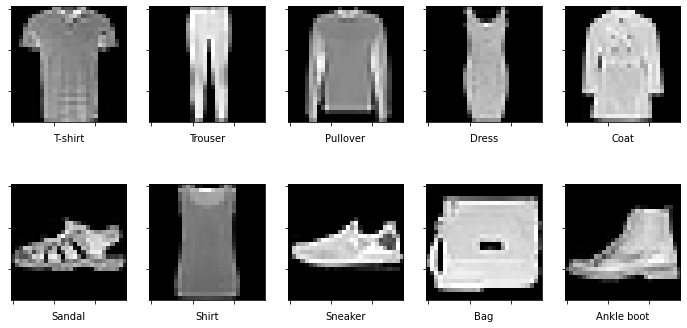

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]]
(6000, 10)
(54000, 784)
(54000, 10)
(6000, 784)
(6000, 10)
(10000, 784)
(10000, 10)


In [5]:
x_train,x_test,x_val,y_train,y_test,y_val,class_names=load_data('fashion_mnist')
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)
no_of_class=10


In [ ]:
# Question 4:
sweep_config={
    'method' : 'bayes' ,
    'metric' : { 'name' : 'val_acc' , 'goal' : 'maximize' } ,
    'parameters' : {
        'epochs' : { 'values' : [5,10,20] },
        'n_hidden_layers' : {'values' : [3,4,5]},
        'n_hidden_layer_size' : { 'values' : [16,32,64,128,256]},
        'batch_size' : { 'values' : [16,32,64,128]},
        'learning_rate' : { 'values' : [0.001, 0.0001,0.0002,0.0003]},
        'optimizer' : { 'values' : ["sgd", "mgd", "nestrov", "rmsprop", "adam", "nadam"] },
        'activations' : { 'values' : ["sigmoid", "tanh", "relu"] },
        'loss_function' : {'values' : ['cross_entropy']},
        'weight_ini' : {'values' : ['random','xavier','he_normal','he_uniform']},
        'weight_decay' : { 'values' : [0,0.0005]}
    }
}

def train():
  config_default={
      'weight_ini':'bayes',
      'n_hidden_layers':3,
      'n_hidden_layer_size':32,
      'optimizer':'sgd',
      'learning_rate':0.01,
      'epoch':10,
      'batch_size':32
  }
  wandb.init(config=config_default)

  c= wandb.config
  name = "op_"+str(c.optimizer)+"_ac_"+str(c.activations)+"_hl_"+str(c.n_hidden_layers)+"_hls_"+str(c.n_hidden_layer_size)+"_ep_"+str(c.epochs)+"_n_"+str(c.learning_rate)+"_bs_"+str(c.batch_size)+"_wi_"+str(c.weight_ini)
  wandb.init(name=name)
  n_points , n_input = np.shape(x_train)

  hn = [n_input]+[c.n_hidden_layer_size]*c.n_hidden_layers +[no_of_class] 
  hl = c.n_hidden_layers
  act = c.activations
  loss=c.loss_function
  opt = c.optimizer
  ep = c.epochs
  bs = c.batch_size
  lr = c.learning_rate
  wi = c.weight_ini
  wd=c.weight_decay

 
  nn = NN(hn,ep,lr,act,loss,opt,wi,bs,'fashion_mnist',0.9,0.95,0.9,0.999,1e-8,wd)

  nn.fit(x_train,y_train,x_test,y_test,x_val,y_val)

  return
sweep_id = wandb.sweep(sweep_config, project="CS6910_Assignment_1")
wandb.agent(sweep_id, function=train,count=20)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Create sweep with ID: k45px6gm
Sweep URL: https://wandb.ai/cs22s015/CS6910_Assignment_1/sweeps/k45px6gm


wandb: Agent Starting Run: rf7xfbr9 with config:
wandb: 	activations: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	learning_rate: 0.001
wandb: 	loss_function: cross_entropy
wandb: 	n_hidden_layer_size: 256
wandb: 	n_hidden_layers: 5
wandb: 	optimizer: nestrov
wandb: 	weight_decay: 0.0005
wandb: 	weight_ini: xavier
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: cs22s015. Use `wandb login --relogin` to force relogin


epoch 1


100%|██████████| 6000/6000 [00:28<00:00, 211.75it/s]


Val Accuracy = 82.26666666666667
Val Loss = 0.9134567504993061


100%|██████████| 54000/54000 [04:17<00:00, 209.76it/s]


Train Accuracy = 83.50555555555556
Train Loss = 0.8769572319861332


100%|██████████| 10000/10000 [00:53<00:00, 186.91it/s]


epoch 2


100%|██████████| 6000/6000 [00:29<00:00, 205.87it/s]


Val Accuracy = 84.0
Val Loss = 0.7274102524090494


 72%|███████▏  | 38771/54000 [03:16<01:08, 221.00it/s]

In [7]:
# Questtion 7 : plot of confusion matrix without using wandb
# training our model for the best configuration 
hidden_layer=[256,256,256,256,256]
no_of_class=10
layer=[x_train.shape[1]]+hidden_layer+[no_of_class]
print(layer)
lr=0.001

nn = NN(layer,10,lr,'relu','cross_entropy','nadam','he_uniform',64,'fashion_mnist',0.9,0.95,0.9,0.999,1e-8,0)

nn.fit(x_train,y_train,x_test,y_test,x_val,y_val)




[784, 256, 256, 256, 256, 256, 10]
epoch 1


100%|██████████| 6000/6000 [00:10<00:00, 582.45it/s]


Val Accuracy = 85.11666666666666
Val Loss = 0.3991888877007504


100%|██████████| 54000/54000 [01:29<00:00, 606.54it/s]


Train Accuracy = 86.28888888888889
Train Loss = 0.36519124417304477


100%|██████████| 10000/10000 [00:14<00:00, 671.88it/s]


epoch 2


100%|██████████| 6000/6000 [00:10<00:00, 598.85it/s]


Val Accuracy = 86.83333333333333
Val Loss = 0.3587469634035413


100%|██████████| 54000/54000 [01:25<00:00, 634.98it/s]


Train Accuracy = 88.4074074074074
Train Loss = 0.3104044421429885


100%|██████████| 10000/10000 [00:15<00:00, 651.66it/s]


epoch 3


100%|██████████| 6000/6000 [00:07<00:00, 787.35it/s]


Val Accuracy = 87.88333333333334
Val Loss = 0.33369724100569664


100%|██████████| 54000/54000 [01:22<00:00, 657.27it/s]


Train Accuracy = 89.72777777777777
Train Loss = 0.27750452341353704


100%|██████████| 10000/10000 [00:14<00:00, 673.04it/s]


epoch 4


100%|██████████| 6000/6000 [00:10<00:00, 578.47it/s]


Val Accuracy = 88.01666666666667
Val Loss = 0.32815291306143246


100%|██████████| 54000/54000 [01:21<00:00, 663.48it/s]


Train Accuracy = 90.1962962962963
Train Loss = 0.2625538619962013


100%|██████████| 10000/10000 [00:14<00:00, 671.57it/s]


epoch 5


100%|██████████| 6000/6000 [00:09<00:00, 657.33it/s]


Val Accuracy = 88.01666666666667
Val Loss = 0.32618782208658864


100%|██████████| 54000/54000 [01:21<00:00, 662.02it/s]


Train Accuracy = 90.54074074074074
Train Loss = 0.25214616818916724


100%|██████████| 10000/10000 [00:14<00:00, 679.11it/s]


epoch 6


100%|██████████| 6000/6000 [00:07<00:00, 770.07it/s]


Val Accuracy = 88.41666666666667
Val Loss = 0.3194804469820171


100%|██████████| 54000/54000 [01:24<00:00, 641.69it/s]


Train Accuracy = 91.06481481481481
Train Loss = 0.23671773651071393


100%|██████████| 10000/10000 [00:14<00:00, 672.67it/s]


epoch 7


100%|██████████| 6000/6000 [00:10<00:00, 588.09it/s]


Val Accuracy = 88.43333333333334
Val Loss = 0.3242450761365492


100%|██████████| 54000/54000 [01:20<00:00, 669.80it/s]


Train Accuracy = 91.32962962962964
Train Loss = 0.22860341822544672


100%|██████████| 10000/10000 [00:15<00:00, 628.01it/s]


epoch 8


100%|██████████| 6000/6000 [00:09<00:00, 607.07it/s]


Val Accuracy = 88.48333333333333
Val Loss = 0.3215222941296633


100%|██████████| 54000/54000 [01:18<00:00, 689.69it/s]


Train Accuracy = 91.71481481481482
Train Loss = 0.21789183442116083


100%|██████████| 10000/10000 [00:14<00:00, 670.87it/s]


epoch 9


100%|██████████| 6000/6000 [00:09<00:00, 608.65it/s]


Val Accuracy = 88.63333333333334
Val Loss = 0.3249658612742691


100%|██████████| 54000/54000 [01:22<00:00, 655.09it/s]


Train Accuracy = 91.97037037037038
Train Loss = 0.2084030413496428


100%|██████████| 10000/10000 [00:14<00:00, 667.17it/s]


epoch 10


100%|██████████| 6000/6000 [00:10<00:00, 583.75it/s]


Val Accuracy = 88.45
Val Loss = 0.3347748217474864


100%|██████████| 54000/54000 [01:21<00:00, 662.06it/s]


Train Accuracy = 92.12777777777778
Train Loss = 0.20428202912313434


100%|██████████| 10000/10000 [00:16<00:00, 611.00it/s]


100%|██████████| 10000/10000 [00:14<00:00, 675.10it/s]


Train Accuracy = 88.05
Train Loss = 0.3549538024824167


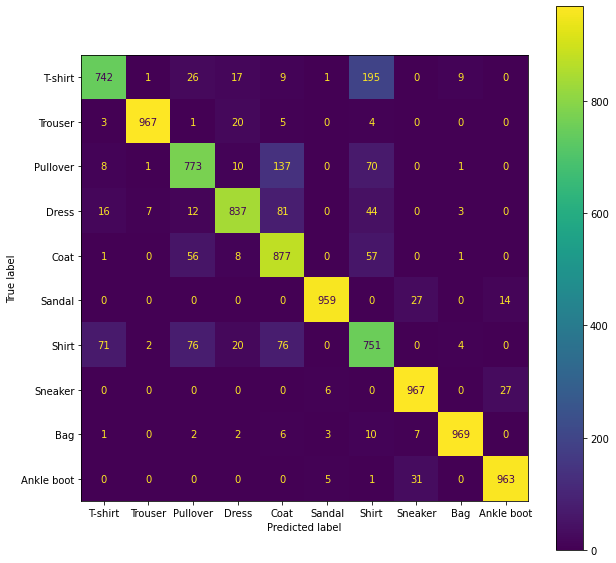

In [10]:
# Questtion 7 : plot of confusion matrix without using wandb
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


test_acc,test_loss,y_true,y_pred=nn.modelPerformance(x_test,y_test)

print("Train Accuracy = " + str(test_acc))
print("Train Loss = " + str(test_loss))
class_names1 = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
wandb.init( project="CS6910_Assignment_1")
wandb.log({"Confusion_Matrix": wandb.plot.confusion_matrix(probs=None,
                        y_true=y_true, preds=y_pred,
                        class_names=class_names1
)})
wandb.log({"Confusion_Matrix": wandb.sklearn.plot_confusion_matrix(y_true, y_pred,class_names1)})

cm = confusion_matrix(y_true,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=class_names1)


fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()
wandb.finish()

In [ ]:
# Question 8: Comparison Between squared error and cross entropy loss 
sweep_config={
    'method' : 'grid' ,
    'metric' : { 'name' : 'val_acc' , 'goal' : 'maximize' } ,
    'parameters' : {
        'epochs' : { 'values' : [10] },
        'n_hidden_layers' : {'values' : [5]},
        'n_hidden_layer_size' : { 'values' : [256]},
        'batch_size' : { 'values' : [64]},
        'learning_rate' : { 'values' : [0.001]},
        'optimizer' : { 'values' : [ "nadam"] },
        'activations' : { 'values' : ["relu"] },
        'loss_function' : {'values' : ['cross_entropy']},
        'weight_ini' : {'values' : ['he_uniform']},
        'weight_decay' : { 'values' : [0]}
    }
}

def train():
  config_default={
      'weight_ini':'he_uniform',
      'n_hidden_layers':3,
      'n_hidden_layer_size':32,
      'optimizer':'sgd',
      'learning_rate':0.01,
      'epoch':10,
      'batch_size':32
  }
  wandb.init(config=config_default)

  c= wandb.config
  name = "op_"+str(c.optimizer)+"_ac_"+str(c.activations)+"_hl_"+str(c.n_hidden_layers)+"_hls_"+str(c.n_hidden_layer_size)+"_ep_"+str(c.epochs)+"_n_"+str(c.learning_rate)+"_bs_"+str(c.batch_size)+"_wi_"+str(c.weight_ini)
  wandb.init(name=name)
  n_points , n_input = np.shape(x_train)

  hn = [n_input]+[c.n_hidden_layer_size]*c.n_hidden_layers +[no_of_class] 
  hl = c.n_hidden_layers
  act = c.activations
  loss=c.loss_function
  opt = c.optimizer
  ep = c.epochs
  bs = c.batch_size
  lr = c.learning_rate
  wi = c.weight_ini
  wd=c.weight_decay

 
  nn = NN(hn,ep,lr,act,loss,opt,wi,bs,"fashion_mnist",0.9,0.95,0.9,0.999,1e-8,wd)

  nn.fit(x_train,y_train,x_test,y_test,x_val,y_val)

  return
sweep_id = wandb.sweep(sweep_config, project="CS6910_Assignment_1")
wandb.agent(sweep_id, function=train,count=1)

Create sweep with ID: oaig37jd
Sweep URL: https://wandb.ai/cs22s015/CS6910_Assignment_1/sweeps/oaig37jd


wandb: Agent Starting Run: dxvoxvkb with config:
wandb: 	activations: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	learning_rate: 0.001
wandb: 	loss_function: cross_entropy
wandb: 	n_hidden_layer_size: 256
wandb: 	n_hidden_layers: 5
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_ini: he_uniform
wandb: Currently logged in as: cs22s015. Use `wandb login --relogin` to force relogin


epoch 1


100%|██████████| 6000/6000 [00:07<00:00, 755.86it/s]


Val Accuracy = 85.11666666666666
Val Loss = 0.3991888877007504


100%|██████████| 54000/54000 [01:26<00:00, 621.02it/s]


Train Accuracy = 86.28888888888889
Train Loss = 0.36519124417304477


100%|██████████| 10000/10000 [00:15<00:00, 627.50it/s]


epoch 2


100%|██████████| 6000/6000 [00:08<00:00, 745.07it/s]


Val Accuracy = 86.83333333333333
Val Loss = 0.3587469634035413


100%|██████████| 54000/54000 [01:27<00:00, 615.95it/s]


Train Accuracy = 88.4074074074074
Train Loss = 0.3104044421429885


100%|██████████| 10000/10000 [00:16<00:00, 607.78it/s]


epoch 3


100%|██████████| 6000/6000 [00:08<00:00, 748.16it/s]


Val Accuracy = 87.88333333333334
Val Loss = 0.33369724100569664


100%|██████████| 54000/54000 [01:27<00:00, 619.88it/s]


Train Accuracy = 89.72777777777777
Train Loss = 0.27750452341353704


100%|██████████| 10000/10000 [00:17<00:00, 556.18it/s]


epoch 4


100%|██████████| 6000/6000 [00:08<00:00, 743.76it/s]


Val Accuracy = 88.01666666666667
Val Loss = 0.32815291306143246


100%|██████████| 54000/54000 [01:29<00:00, 602.73it/s]


Train Accuracy = 90.1962962962963
Train Loss = 0.2625538619962013


100%|██████████| 10000/10000 [00:18<00:00, 540.44it/s]


epoch 5


100%|██████████| 6000/6000 [00:08<00:00, 725.97it/s]


Val Accuracy = 88.01666666666667
Val Loss = 0.32618782208658864


100%|██████████| 54000/54000 [01:28<00:00, 610.79it/s]


Train Accuracy = 90.54074074074074
Train Loss = 0.25214616818916724


100%|██████████| 10000/10000 [00:16<00:00, 589.07it/s]


epoch 6


100%|██████████| 6000/6000 [00:07<00:00, 753.91it/s]


Val Accuracy = 88.41666666666667
Val Loss = 0.3194804469820171


100%|██████████| 54000/54000 [01:33<00:00, 574.68it/s]


Train Accuracy = 91.06481481481481
Train Loss = 0.23671773651071393


100%|██████████| 10000/10000 [00:15<00:00, 639.75it/s]


epoch 7


100%|██████████| 6000/6000 [00:10<00:00, 576.82it/s]


Val Accuracy = 88.43333333333334
Val Loss = 0.3242450761365492


100%|██████████| 54000/54000 [01:24<00:00, 638.94it/s]


Train Accuracy = 91.32962962962964
Train Loss = 0.22860341822544672


100%|██████████| 10000/10000 [00:16<00:00, 598.49it/s]


epoch 8


100%|██████████| 6000/6000 [00:08<00:00, 736.75it/s]


Val Accuracy = 88.48333333333333
Val Loss = 0.3215222941296633


100%|██████████| 54000/54000 [01:27<00:00, 619.74it/s]


Train Accuracy = 91.71481481481482
Train Loss = 0.21789183442116083


100%|██████████| 10000/10000 [00:15<00:00, 631.16it/s]


epoch 9


100%|██████████| 6000/6000 [00:08<00:00, 675.43it/s]


Val Accuracy = 88.63333333333334
Val Loss = 0.3249658612742691


100%|██████████| 54000/54000 [01:26<00:00, 626.12it/s]


Train Accuracy = 91.97037037037038
Train Loss = 0.2084030413496428


100%|██████████| 10000/10000 [00:15<00:00, 635.89it/s]


epoch 10


100%|██████████| 6000/6000 [00:10<00:00, 579.06it/s]


Val Accuracy = 88.45
Val Loss = 0.3347748217474864


100%|██████████| 54000/54000 [01:26<00:00, 625.05it/s]


Train Accuracy = 92.12777777777778
Train Loss = 0.20428202912313434


100%|██████████| 10000/10000 [00:15<00:00, 637.66it/s]


epoch,▁▁▁▁▁▁▁▁▁▁
test_acc,▁▅▇▇▇█████
test_loss,█▄▂▁▁▁▂▂▂▃
train_acc,▁▄▅▆▆▇▇███
train_loss,█▆▄▄▃▂▂▂▁▁
val_acc,▁▄▇▇▇█████
val_loss,█▄▂▂▂▁▁▁▁▂
epoch,11
test_acc,88.05
test_loss,0.35495
train_acc,92.12778


In [ ]:
# Question 8: 
sweep_config={
    'method' : 'grid' ,
    'metric' : { 'name' : 'val_acc' , 'goal' : 'maximize' } ,
    'parameters' : {
        'epochs' : { 'values' : [10] },
        'n_hidden_layers' : {'values' : [5]},
        'n_hidden_layer_size' : { 'values' : [256]},
        'batch_size' : { 'values' : [64]},
        'learning_rate' : { 'values' : [0.001]},
        'optimizer' : { 'values' : [ "nadam"] },
        'activations' : { 'values' : ["relu"] },
        'loss_function' : {'values' : ['squared_error']},
        'weight_ini' : {'values' : ['he_uniform']},
        'weight_decay' : { 'values' : [0]}
    }
}

def train():
  config_default={
      'weight_ini':'he_uniform',
      'n_hidden_layers':3,
      'n_hidden_layer_size':32,
      'optimizer':'sgd',
      'learning_rate':0.01,
      'epoch':10,
      'batch_size':32
  }
  wandb.init(config=config_default)

  c= wandb.config
  name = "op_"+str(c.optimizer)+"_ac_"+str(c.activations)+"_hl_"+str(c.n_hidden_layers)+"_hls_"+str(c.n_hidden_layer_size)+"_ep_"+str(c.epochs)+"_n_"+str(c.learning_rate)+"_bs_"+str(c.batch_size)+"_wi_"+str(c.weight_ini)
  wandb.init(name=name)
  n_points , n_input = np.shape(x_train)

  hn = [n_input]+[c.n_hidden_layer_size]*c.n_hidden_layers +[no_of_class] 
  hl = c.n_hidden_layers
  act = c.activations
  loss=c.loss_function
  opt = c.optimizer
  ep = c.epochs
  bs = c.batch_size
  lr = c.learning_rate
  wi = c.weight_ini
  wd=c.weight_decay

 
  nn = NN(hn,ep,lr,act,loss,opt,wi,bs,"fashion_mnist",0.9,0.95,0.9,0.999,1e-8,wd)

  nn.fit(x_train,y_train,x_test,y_test,x_val,y_val)

  return
sweep_id = wandb.sweep(sweep_config, project="CS6910_Assignment_1")
wandb.agent(sweep_id, function=train,count=1)

Create sweep with ID: tn95hue6
Sweep URL: https://wandb.ai/cs22s015/CS6910_Assignment_1/sweeps/tn95hue6


wandb: Agent Starting Run: 7vagwp93 with config:
wandb: 	activations: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	learning_rate: 0.001
wandb: 	loss_function: squared_error
wandb: 	n_hidden_layer_size: 256
wandb: 	n_hidden_layers: 5
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_ini: he_uniform


epoch 1


100%|██████████| 6000/6000 [00:08<00:00, 670.48it/s]


Val Accuracy = 10.15
Val Loss = 18.0


100%|██████████| 54000/54000 [01:30<00:00, 597.49it/s]


Train Accuracy = 9.983333333333333
Train Loss = 18.0


100%|██████████| 10000/10000 [00:16<00:00, 620.83it/s]


epoch 2


100%|██████████| 6000/6000 [00:10<00:00, 563.36it/s]


Val Accuracy = 10.15
Val Loss = 18.0


100%|██████████| 54000/54000 [01:27<00:00, 617.42it/s]


Train Accuracy = 9.983333333333333
Train Loss = 18.0


100%|██████████| 10000/10000 [00:16<00:00, 618.56it/s]


epoch 3


100%|██████████| 6000/6000 [00:09<00:00, 658.17it/s]


Val Accuracy = 10.15
Val Loss = 18.0


100%|██████████| 54000/54000 [01:26<00:00, 626.56it/s]


Train Accuracy = 9.983333333333333
Train Loss = 18.0


100%|██████████| 10000/10000 [00:17<00:00, 570.34it/s]


epoch 4


100%|██████████| 6000/6000 [00:10<00:00, 563.69it/s]


Val Accuracy = 10.15
Val Loss = 18.0


100%|██████████| 54000/54000 [01:29<00:00, 606.29it/s]


Train Accuracy = 9.983333333333333
Train Loss = 18.0


100%|██████████| 10000/10000 [00:16<00:00, 613.31it/s]


epoch 5


100%|██████████| 6000/6000 [00:10<00:00, 589.65it/s]


Val Accuracy = 10.15
Val Loss = 18.0


100%|██████████| 54000/54000 [01:26<00:00, 622.39it/s]


Train Accuracy = 9.983333333333333
Train Loss = 18.0


100%|██████████| 10000/10000 [00:16<00:00, 606.56it/s]


epoch 6


100%|██████████| 6000/6000 [00:10<00:00, 573.73it/s]


Val Accuracy = 10.15
Val Loss = 18.0


100%|██████████| 54000/54000 [01:27<00:00, 620.00it/s]


Train Accuracy = 9.983333333333333
Train Loss = 18.0


100%|██████████| 10000/10000 [00:15<00:00, 627.21it/s]


epoch 7


100%|██████████| 6000/6000 [00:08<00:00, 748.60it/s]


Val Accuracy = 10.15
Val Loss = 18.0


100%|██████████| 54000/54000 [01:27<00:00, 616.99it/s]


Train Accuracy = 9.983333333333333
Train Loss = 18.0


100%|██████████| 10000/10000 [00:16<00:00, 595.69it/s]


epoch 8


100%|██████████| 6000/6000 [00:10<00:00, 580.87it/s]


Val Accuracy = 10.15
Val Loss = 18.0


100%|██████████| 54000/54000 [01:26<00:00, 621.76it/s]


Train Accuracy = 9.983333333333333
Train Loss = 18.0


100%|██████████| 10000/10000 [00:15<00:00, 631.38it/s]


epoch 9


100%|██████████| 6000/6000 [00:15<00:00, 378.63it/s]


Val Accuracy = 10.15
Val Loss = 18.0


100%|██████████| 54000/54000 [02:25<00:00, 372.31it/s]


Train Accuracy = 9.983333333333333
Train Loss = 18.0


100%|██████████| 10000/10000 [00:16<00:00, 624.19it/s]


epoch 10


100%|██████████| 6000/6000 [00:08<00:00, 693.76it/s]


Val Accuracy = 10.15
Val Loss = 18.0


100%|██████████| 54000/54000 [01:31<00:00, 588.93it/s]


Train Accuracy = 9.983333333333333
Train Loss = 18.0


100%|██████████| 10000/10000 [00:16<00:00, 613.11it/s]


epoch,▁▁▁▁▁▁▁▁▁▁
test_acc,▁▁▁▁▁▁▁▁▁▁
test_loss,▁▁▁▁▁▁▁▁▁▁
train_acc,▁▁▁▁▁▁▁▁▁▁
train_loss,▁▁▁▁▁▁▁▁▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁
val_loss,▁▁▁▁▁▁▁▁▁▁
epoch,11
test_acc,10.0
test_loss,18.0
train_acc,9.98333


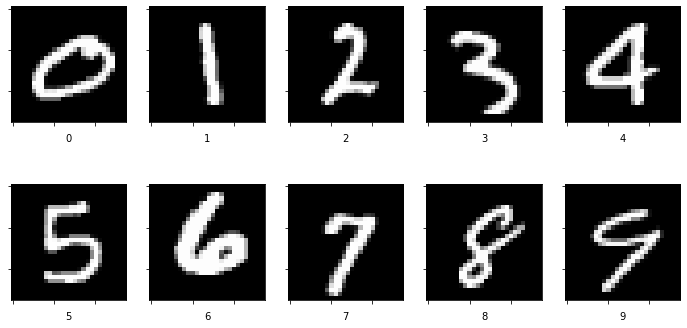

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]
(6000, 10)
(54000, 784)
(54000, 10)
(6000, 784)
(6000, 10)
(10000, 784)
(10000, 10)


In [ ]:
# Question 10:
x_train,x_test,x_val,y_train,y_test,y_val,class_names=load_data('mnist')
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)


In [ ]:
# Question 10: Configuration 1
hidden_layer=[256,256,256,256,256]
no_of_class=10
layer=[x_train.shape[1]]+hidden_layer+[no_of_class]
print(layer_dim)
lr=0.001
nn = NN(layer,10,lr,'relu','cross_entropy','nadam','he_uniform',64,'mnist',0.9,0.95,0.9,0.999,1e-8,0)
nn.fit(x_train,y_train,x_test,y_test,x_val,y_val)
# Testing
test_acc, test_loss, y_true, y_pred = nn.modelPerformance(x_test, y_test)
print("Testing Accuracy = " + str(test_acc))
print("Testing Loss = " + str(test_loss))
  

[784, 256, 256, 256, 256, 256, 10]
epoch 1


100%|██████████| 6000/6000 [00:08<00:00, 688.54it/s]


Val Accuracy = 96.33333333333333
Val Loss = 0.11768992659890182


100%|██████████| 54000/54000 [01:24<00:00, 636.47it/s]


Train Accuracy = 97.66296296296296
Train Loss = 0.07673502413883294


100%|██████████| 10000/10000 [00:16<00:00, 605.69it/s]


epoch 2


100%|██████████| 6000/6000 [00:10<00:00, 583.75it/s]


Val Accuracy = 96.86666666666666
Val Loss = 0.11357065241622778


100%|██████████| 54000/54000 [01:24<00:00, 642.74it/s]


Train Accuracy = 98.45
Train Loss = 0.049474729452334124


100%|██████████| 10000/10000 [00:16<00:00, 624.64it/s]


epoch 3


100%|██████████| 6000/6000 [00:10<00:00, 584.51it/s]


Val Accuracy = 97.0
Val Loss = 0.10923516130438098


100%|██████████| 54000/54000 [01:23<00:00, 649.91it/s]


Train Accuracy = 98.92037037037036
Train Loss = 0.03286483477677935


100%|██████████| 10000/10000 [00:16<00:00, 606.29it/s]


epoch 4


100%|██████████| 6000/6000 [00:10<00:00, 585.22it/s]


Val Accuracy = 97.31666666666666
Val Loss = 0.1150999216497724


100%|██████████| 54000/54000 [01:24<00:00, 641.58it/s]


Train Accuracy = 99.25555555555556
Train Loss = 0.023119229593266323


100%|██████████| 10000/10000 [00:16<00:00, 600.17it/s]


epoch 5


100%|██████████| 6000/6000 [00:10<00:00, 577.59it/s]


Val Accuracy = 97.45
Val Loss = 0.12353631780749405


100%|██████████| 54000/54000 [01:26<00:00, 625.37it/s]


Train Accuracy = 99.36111111111111
Train Loss = 0.01807648025012895


100%|██████████| 10000/10000 [00:15<00:00, 631.22it/s]


epoch 6


100%|██████████| 6000/6000 [00:10<00:00, 592.06it/s]


Val Accuracy = 97.36666666666666
Val Loss = 0.13170639215062133


100%|██████████| 54000/54000 [01:26<00:00, 625.73it/s]


Train Accuracy = 99.35
Train Loss = 0.018840673054583205


100%|██████████| 10000/10000 [00:15<00:00, 631.72it/s]


epoch 7


100%|██████████| 6000/6000 [00:09<00:00, 642.90it/s]


Val Accuracy = 97.51666666666667
Val Loss = 0.12534847716636446


100%|██████████| 54000/54000 [01:27<00:00, 619.26it/s]


Train Accuracy = 99.71666666666667
Train Loss = 0.008491969024256618


100%|██████████| 10000/10000 [00:15<00:00, 640.71it/s]


epoch 8


100%|██████████| 6000/6000 [00:10<00:00, 569.87it/s]


Val Accuracy = 97.38333333333334
Val Loss = 0.14860728183840244


100%|██████████| 54000/54000 [01:27<00:00, 617.47it/s]


Train Accuracy = 99.69444444444444
Train Loss = 0.009411406061182665


100%|██████████| 10000/10000 [00:16<00:00, 622.55it/s]


epoch 9


100%|██████████| 6000/6000 [00:08<00:00, 722.87it/s]


Val Accuracy = 97.35
Val Loss = 0.15765426310088596


100%|██████████| 54000/54000 [01:25<00:00, 628.54it/s]


Train Accuracy = 99.61296296296297
Train Loss = 0.011343534089885542


100%|██████████| 10000/10000 [00:16<00:00, 619.20it/s]


epoch 10


100%|██████████| 6000/6000 [00:10<00:00, 578.20it/s]


Val Accuracy = 97.2
Val Loss = 0.16589195626130382


100%|██████████| 54000/54000 [01:26<00:00, 623.96it/s]


Train Accuracy = 99.63888888888889
Train Loss = 0.009934242041185284


100%|██████████| 10000/10000 [00:20<00:00, 490.81it/s]

Testing Accuracy = 97.76
Testing Loss = 0.11335780895676643


In [ ]:
# Question 10: Configuration 2 
h_layer=[128,128,128,128]
no_of_class=10
l=[x_train.shape[1]]+h_layer+[no_of_class]
print(l)
lr=0.001
nn = NN(l,10,lr,'relu','cross_entropy','nadam','he_uniform',64,'mnist',0.9,0.95,0.9,0.999,1e-8,0)
nn.fit(x_train,y_train,x_test,y_test,x_val,y_val)
# Testing
test_acc, test_loss, y_true, y_pred = nn.modelPerformance(x_test, y_test)
print("Testing Accuracy = " + str(test_acc))
print("Testing Loss = " + str(test_loss))

print("##########################################################################")
# Question 10: Configuration 3
nn = NN(l,10,lr,'relu','cross_entropy','rmsprop','he_uniform',64,'mnist',0.9,0.95,0.9,0.999,1e-8,0)
nn.fit(x_train,y_train,x_test,y_test,x_val,y_val)
# Testing
test_acc, test_loss, y_true, y_pred = nn.modelPerformance(x_test, y_test)
print("Testing Accuracy = " + str(test_acc))
print("Testing Loss = " + str(test_loss))

  

[784, 128, 128, 128, 128, 10]
epoch 1


100%|██████████| 6000/6000 [00:06<00:00, 956.61it/s] 


Val Accuracy = 95.96666666666667
Val Loss = 0.14179099921826696


100%|██████████| 54000/54000 [00:37<00:00, 1447.08it/s]


Train Accuracy = 96.8425925925926
Train Loss = 0.10909236328200556


100%|██████████| 10000/10000 [00:08<00:00, 1134.11it/s]


epoch 2


100%|██████████| 6000/6000 [00:06<00:00, 955.06it/s] 


Val Accuracy = 96.8
Val Loss = 0.11961426965901285


100%|██████████| 54000/54000 [00:37<00:00, 1450.97it/s]


Train Accuracy = 97.75925925925925
Train Loss = 0.07573472397391169


100%|██████████| 10000/10000 [00:08<00:00, 1157.48it/s]


epoch 3


100%|██████████| 6000/6000 [00:05<00:00, 1012.19it/s]


Val Accuracy = 97.01666666666667
Val Loss = 0.11122614313802429


100%|██████████| 54000/54000 [00:37<00:00, 1428.16it/s]


Train Accuracy = 98.30925925925926
Train Loss = 0.057510297217692956


100%|██████████| 10000/10000 [00:08<00:00, 1161.47it/s]


epoch 4


100%|██████████| 6000/6000 [00:05<00:00, 1195.84it/s]


Val Accuracy = 96.96666666666667
Val Loss = 0.10787167446959027


100%|██████████| 54000/54000 [00:38<00:00, 1398.94it/s]


Train Accuracy = 98.70370370370371
Train Loss = 0.045811882689025696


100%|██████████| 10000/10000 [00:08<00:00, 1149.83it/s]


epoch 5


100%|██████████| 6000/6000 [00:03<00:00, 1514.33it/s]


Val Accuracy = 97.0
Val Loss = 0.10624716455615821


100%|██████████| 54000/54000 [00:39<00:00, 1376.70it/s]


Train Accuracy = 98.97407407407407
Train Loss = 0.036640192414229084


100%|██████████| 10000/10000 [00:08<00:00, 1147.69it/s]


epoch 6


100%|██████████| 6000/6000 [00:03<00:00, 1657.64it/s]


Val Accuracy = 97.23333333333333
Val Loss = 0.10592624157721339


100%|██████████| 54000/54000 [00:40<00:00, 1343.47it/s]


Train Accuracy = 99.17407407407407
Train Loss = 0.029811147625702562


100%|██████████| 10000/10000 [00:08<00:00, 1146.97it/s]


epoch 7


100%|██████████| 6000/6000 [00:03<00:00, 1660.78it/s]


Val Accuracy = 97.26666666666667
Val Loss = 0.10594834022705779


100%|██████████| 54000/54000 [00:40<00:00, 1339.08it/s]


Train Accuracy = 99.35
Train Loss = 0.02434202286207727


100%|██████████| 10000/10000 [00:07<00:00, 1279.92it/s]


epoch 8


100%|██████████| 6000/6000 [00:03<00:00, 1593.71it/s]


Val Accuracy = 97.35
Val Loss = 0.10764771470568951


100%|██████████| 54000/54000 [00:40<00:00, 1333.13it/s]


Train Accuracy = 99.45925925925926
Train Loss = 0.020376466099533638


100%|██████████| 10000/10000 [00:07<00:00, 1299.58it/s]


epoch 9


100%|██████████| 6000/6000 [00:03<00:00, 1650.56it/s]


Val Accuracy = 97.33333333333333
Val Loss = 0.11051496940299878


100%|██████████| 54000/54000 [00:40<00:00, 1335.86it/s]


Train Accuracy = 99.5425925925926
Train Loss = 0.017351431971454084


100%|██████████| 10000/10000 [00:07<00:00, 1292.39it/s]


epoch 10


100%|██████████| 6000/6000 [00:04<00:00, 1376.95it/s]


Val Accuracy = 97.3
Val Loss = 0.11517039109810562


100%|██████████| 54000/54000 [00:39<00:00, 1352.83it/s]


Train Accuracy = 99.61851851851851
Train Loss = 0.014539238512189029


100%|██████████| 10000/10000 [00:06<00:00, 1577.25it/s]


Testing Accuracy = 97.76
Testing Loss = 0.0868389582301557
##########################################################################
epoch 1


100%|██████████| 6000/6000 [00:03<00:00, 1704.07it/s]


Val Accuracy = 95.91666666666667
Val Loss = 0.14281029299269135


100%|██████████| 54000/54000 [00:40<00:00, 1345.78it/s]


Train Accuracy = 96.49814814814815
Train Loss = 0.11123396874803725


100%|██████████| 10000/10000 [00:06<00:00, 1657.42it/s]


epoch 2


100%|██████████| 6000/6000 [00:04<00:00, 1268.42it/s]


Val Accuracy = 96.48333333333333
Val Loss = 0.12889148493008498


100%|██████████| 54000/54000 [00:40<00:00, 1323.51it/s]


Train Accuracy = 97.66851851851852
Train Loss = 0.07821726924867285


100%|██████████| 10000/10000 [00:06<00:00, 1562.73it/s]


epoch 3


100%|██████████| 6000/6000 [00:03<00:00, 1686.41it/s]


Val Accuracy = 96.7
Val Loss = 0.12990214494751368


100%|██████████| 54000/54000 [00:40<00:00, 1340.92it/s]


Train Accuracy = 98.0925925925926
Train Loss = 0.061288010486164245


100%|██████████| 10000/10000 [00:06<00:00, 1654.66it/s]


epoch 4


100%|██████████| 6000/6000 [00:05<00:00, 1160.73it/s]


Val Accuracy = 96.95
Val Loss = 0.12953188249307793


100%|██████████| 54000/54000 [00:38<00:00, 1386.99it/s]


Train Accuracy = 98.72407407407407
Train Loss = 0.04076466792295191


100%|██████████| 10000/10000 [00:07<00:00, 1295.65it/s]


epoch 5


100%|██████████| 6000/6000 [00:06<00:00, 949.12it/s] 


Val Accuracy = 97.06666666666666
Val Loss = 0.15507497293978395


100%|██████████| 54000/54000 [00:38<00:00, 1396.56it/s]


Train Accuracy = 98.75925925925925
Train Loss = 0.0411367142591468


100%|██████████| 10000/10000 [00:09<00:00, 1000.90it/s]


epoch 6


100%|██████████| 6000/6000 [00:03<00:00, 1655.31it/s]


Val Accuracy = 97.13333333333334
Val Loss = 0.15310719395142533


100%|██████████| 54000/54000 [00:40<00:00, 1338.35it/s]


Train Accuracy = 99.12592592592593
Train Loss = 0.03116192699940894


100%|██████████| 10000/10000 [00:06<00:00, 1636.74it/s]


epoch 7


100%|██████████| 6000/6000 [00:03<00:00, 1643.64it/s]


Val Accuracy = 97.1
Val Loss = 0.18057278609461283


100%|██████████| 54000/54000 [00:42<00:00, 1277.61it/s]


Train Accuracy = 98.87407407407407
Train Loss = 0.04503609875048277


100%|██████████| 10000/10000 [00:06<00:00, 1617.14it/s]


epoch 8


100%|██████████| 6000/6000 [00:03<00:00, 1646.93it/s]


Val Accuracy = 97.08333333333333
Val Loss = 0.1929883358073311


100%|██████████| 54000/54000 [00:40<00:00, 1347.59it/s]


Train Accuracy = 98.87777777777778
Train Loss = 0.04382691949741509


100%|██████████| 10000/10000 [00:06<00:00, 1621.72it/s]


epoch 9


100%|██████████| 6000/6000 [00:03<00:00, 1690.55it/s]


Val Accuracy = 97.05
Val Loss = 0.19295120952762046


100%|██████████| 54000/54000 [00:39<00:00, 1350.20it/s]


Train Accuracy = 99.04629629629629
Train Loss = 0.0351631050857411


100%|██████████| 10000/10000 [00:06<00:00, 1615.65it/s]


epoch 10


100%|██████████| 6000/6000 [00:04<00:00, 1206.57it/s]


Val Accuracy = 97.45
Val Loss = 0.1790395100890333


100%|██████████| 54000/54000 [00:40<00:00, 1333.25it/s]


Train Accuracy = 99.52407407407408
Train Loss = 0.015888872021203163


100%|██████████| 10000/10000 [00:08<00:00, 1202.76it/s]

Testing Accuracy = 98.04
Testing Loss = 0.12807070591631858


In [ ]:
import argparse

parser = argparse.ArgumentParser()
parser.add_argument('-wp','--wandb_project', type=str, default='CS6910_Assignment_1')
parser.add_argument('-we','--wandb_entity', type=int, default='cs22s015')
parser.add_argument('-d','--dataset', type=str, default='fashion_mnist')
parser.add_argument('-e','--epochs', type=int, default=10)
parser.add_argument('-b','--batch_size', type=int, default=64)
parser.add_argument('-l','--loss', type=str, default='cross_entropy')
parser.add_argument('-o','--optimizer', type=str, default='nadam')
parser.add_argument('-l','--learning_rate', type=float, default=0.001)
parser.add_argument('-m','--momentum', type=float, default=0.9)
parser.add_argument('-beta','--beta', type=float, default=0.95)
parser.add_argument('-beta1','--beta1', type=float, default=0.9)
parser.add_argument('-beta2','--beta2', type=float, default=0.999)
parser.add_argument('-eps','--epsilon', type=float, default=1e-8)
parser.add_argument('-w_d','--weight_decay', type=float, default=0)
parser.add_argument('-w_i','--weight_init', type=str, default='he_uniform')
parser.add_argument('-sz','--hidden_size', type=int, default=256)
parser.add_argument('-nhl','--num_layers', type=int, default=5)
parser.add_argument('-a','--activation', type=str, default='relu')
args = parser.parse_args()

if __name__=='__main__':
  layers=[]
  layers.append(784)
  num_layers=args.num_layers
  hlayer_size=args.hidden_size
  for i in range(num_layers):
    layers.append(hlayer_size)
  layers.append(10)


  nn = NN(layers,args.epochs,args.learning_rate,args.activation,args.loss,args.optimizer,args.weight_init,args.batch_size,args.dataset,args.momentum,args.beta,args.beta1,args.beta2,args.epsilon,args.weight_decay)
  x_train,x_test,x_val,y_train,y_test,y_val,class_names=nn.load_data(args.dataset)
  
  nn.fit(x_train,y_train,x_test,y_test,x_val,y_val)

  # Testing
  class_names1 = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  test_acc, test_loss, y_true, y_pred = nn.modelPerformance(x_test, y_test)
  
  print("Testing Accuracy = " + str(test_acc))
  print("Testing Loss = " + str(test_loss))
  wandb.log({"test_acc": test_acc})
  wandb.log({"Confusion_Matrix": wandb.sklearn.plot_confusion_matrix(y_true, y_pred,class_names1)})

